# Using Meta as a Library
In this notebook we show how to use Meta as a library for connecting and displaying results from the SOLR tool interactively using the jupyter notebook front end.

In [1]:
import os, sys
sys.path.append('..') # since meta is one directory up
from meta.app import app # essential for avoiding recursive dependenciesfrom meta import query
from meta.query import DEFAULT_PAYLOAD, query_body
from meta.solr import solr_url
from meta.paging import calc
from meta.facets import prepare_facets
from meta.grouping import group
import json, requests
import pandas as pd
#solr_url = lambda : 'http://ec2-52-212-187-178.eu-west-1.compute.amazonaws.com:8983/solr/grouping/query'

In [2]:
# make a simple query
params = DEFAULT_PAYLOAD
params['limit'] = 2000
payload = query_body(params)
headers = {'content-type': "application/json"}
response = requests.get(solr_url(app.config), data=json.dumps(payload), headers=headers)
data = response.json()
docs = data['grouped']['PatientID']
docs = group(docs)
facets = prepare_facets(data.get('facets', []), '')
results = data['grouped']['PatientID']['ngroups']
paging = calc(results, params.get('offset', '0'))

# Patients
Show the patients in the results

In [3]:
pd.DataFrame([cgroup['patient'] for cgroup in docs['groups']]).sample(5)

,birthdate,name
59,11.02.1951,Thomas Q. Nizza
55,05.04.1952,Joshy O. Munich
36,17.10.1972,Bram S. Konstanz
47,21.11.1965,Joachim T. Munich
41,06.12.1975,Joshy D. Nizza


# Show all of the Accession Number
Show the results by the accession number

In [4]:
from itertools import chain
all_asn_data = pd.DataFrame(list(chain(*[list(cgroup['by_AccessionNumber'].values())[0] for cgroup in docs['groups']])))
all_asn_data.sample(5)

,AccessionNumber,BodyPartExamined,InstanceAvailability,InstanceNumber,InstitutionName,Modality,PatientBirthDate,PatientID,PatientName,PatientSex,...,SeriesDescription,SeriesInstanceUID,SeriesNumber,StudyDate,StudyDescription,StudyID,StudyInstanceUID,StudyTime,_version_,id
26,ZH140328MR3052,Missing,Missing,[225],Wankdorf Pathology Center,MR,19440411,10199527,Joachim P. Konstanz,M,...,t1_mpr_sag_p2_iso_256_1x1x1,1.3.12.2.1107.5.2.32.35424.2014032818452939456...,5,20140328,NaN,653499,1.2.840.113619.186.35125912074.201403281548178...,[183929.796],1557074467299000323,20
29,ME140221MR3012,Missing,Missing,[26],Wankdorf Pathology Center,MR,19620122,10195082,Bram J. Konstanz,M,...,t1_tse_tra_384,1.3.12.2.1107.5.2.32.35424.2014022111111886259...,3,20140221,NaN,636345,1.2.840.113619.186.35125912074.201402210923372...,[110656.75],1557074467300048896,22
84,ME140506MR3028,Missing,Missing,[9],Wankdorf Pathology Center,MR,19910610,10205057,Kevin O. Bari,M,...,ep2d_diff_3scan_trace_p2,1.3.12.2.1107.5.2.32.35424.2014050612494926443...,8,20140506,NaN,670801,1.2.840.113619.186.35125912074.201405060922273...,[123326.859],1557074467308437505,76
66,ME141011MR3001,Missing,Missing,[142],Wankdorf Pathology Center,MR,19651121,10223038,Joachim T. Munich,M,...,ep2d_diff_3scan_trace_8B_value,1.3.12.2.1107.5.2.32.35424.2014101108194092499...,6,20141011,NaN,742087,1.2.840.113619.186.35125912074.201410110719390...,[80801.593],1557074467310534656,91
71,ME141127MR3022,Missing,Missing,[10],Wankdorf Pathology Center,MR,19990730,10231790,Joachim P. Bari,M,...,t1_tse_cor-384,1.3.12.2.1107.5.2.32.35424.2014112712362673689...,5,20141127,NaN,768981,1.2.840.113619.186.35125912074.201411270916472...,[122709.0],1557074467309486086,90


# Simple Graphics
Here we can show a few simple plots based on the underlying data in _SOLR_ 

In [5]:
import matplotlib.pyplot as plt
import seaborn
import numpy as np

/Users/irrwitz/anaconda/envs/snakes/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


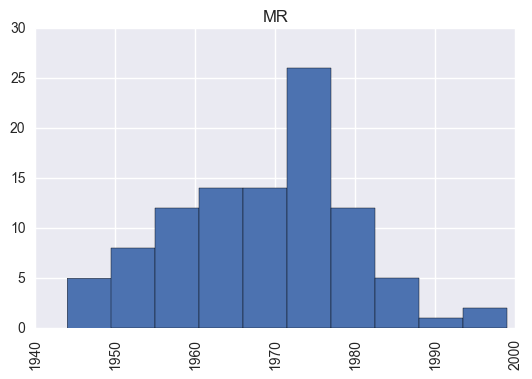

In [6]:
%matplotlib inline
all_asn_data['BirthYear'] = all_asn_data['PatientBirthDate'].map(lambda x: int(str(x)[0:4]))
_ = all_asn_data['BirthYear'].hist(by = all_asn_data['Modality'])

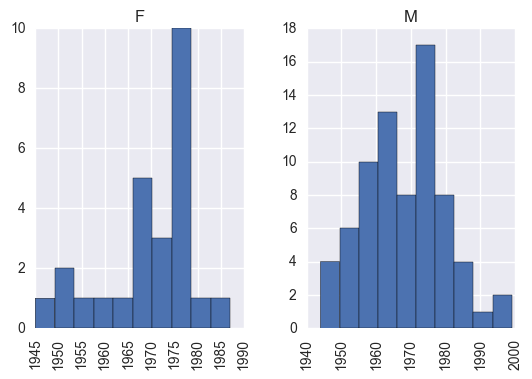

In [7]:
%matplotlib inline
_ = all_asn_data['BirthYear'].hist(by = all_asn_data['PatientSex'])